# Limpieza, Manipulación y Análisis Exploratorio con pandas, datetime, matplotlib y seaborn

## Importamos librerías y tablas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
m_clientes = pd.read_excel('maestro_clientes.xlsx')
m_productos = pd.read_csv('maestro_productos.csv')
sellin_total = pd.read_csv('sellin-total.csv')
proveedor1 = pd.read_csv('sellout-proveedor1.csv')
proveedor2 = pd.read_csv('sellout-proveedor2.csv')

## 1. Exploración y limpieza Tabla Clientes

Contiene info sobre tiendas y distribuidores que venden los productos del cliente

Columnas
- NUM TDA – int64
    Representa el número de identificación de la tienda, empieza en el 2 y no todas las tiendas tienen el mismo número
- NOMBRE DE TDA – object
    Nombre del distribuidor, aunque algunos se repiten la mayoría solo aparecen una vez
- CADENA – object
    Nombre del proveedor, la mayoría es del proveedor_2 (2215), con 237 apariciones del proveedor₁.
- FORMATO – object
    El tipo de tienda que es (Grocery, SmallShop, Shop...)
- MUNICIPIO/CIUDAD – object
    El Municipio en el que está la tienda.
- ESTADO – object
    El Estado en el que está la tienda.
- DIVISION – object
    La división en la que está (tipo OCCIDENTE; CENTRO; SUROESTE....)
- DEPOSITO / DISTRIBUIDOR – object
    El Distribuidor que pasa los productos.
- ESTRUCTURA – object
    Tres valores: FORANEO, METRO, DISTRIBUIDORES.
- GRADO – object
    Grado, del I al VI.

In [3]:
m_clientes.head()

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


In [4]:
# Comprobar que no hay ningun valor NaN
clientes_nan = m_clientes.isna().sum()
clientes_nan

#Resultado: Ningún NaN en la tabla Clientes

NUM TDA                    0
NOMBRE DE TDA              0
CADENA                     0
FORMATO                    0
MUNICIPIO/CIUDAD           0
ESTADO                     0
DIVISION                   0
DEPOSITO / DISTRIBUIDOR    0
ESTRUCTURA                 0
GRADO                      0
dtype: int64

In [5]:
#Buscamos valores repetidos en NUM TDA
m_clientes['NUM TDA'].value_counts()

#Resultado: Los valores 2468, 143, 240 y 58 están duplicados

NUM TDA
2568    2
143     2
240     2
58      2
3314    1
       ..
1935    1
1936    1
1937    1
1938    1
2338    1
Name: count, Length: 2448, dtype: int64

In [6]:
# Comparamos NUM TDA con columna Store_Id de la tabla proveedores para ver si contiene los mismos valores y decidir así si cambiar el nombre de la columna
comparacion = m_clientes['NUM TDA'].unique()
comparacion2 = proveedor1['Store_Id'].isin(comparacion)
print(proveedor1['Store_Id'][comparacion2])

#Resultado: Efectivamente, los valores de ambas tablas coinciden

0           18
1           24
2           39
3           44
4           46
          ... 
1206359    703
1206360    705
1206361    706
1206362    707
1206363    708
Name: Store_Id, Length: 1172265, dtype: int64


### Cambios propuestos:
* Valores repetidos: De la columna ‘NUM TDA’ encontramos que los valores 2568, 143, 240 y 58 aparecen 2 veces. Valorar si unificarlos, pero realmente tienen información diferente aunque la tienda se llame igual. Pueden hacer referencia a diferentes establecimientos del mismo dueño.
* Cambiar nombres: MUNICIPIO/CIUDAD y DEPOSITO / DISTRIBUIDOR, quitando esas barras para evitar problemas a la hora de la consulta
* Num TDA: cambiar a Store_Id para que coincida con el resto de columnas 

In [7]:
# Renombre las columnas NUM TDA, MUNICIPIO/CIUDAD, CADENA y DEPOSITO / DISTRIBUIDOR para hacerlas mas accesibles

m_clientes.rename(columns={'NUM TDA': 'Store_Id','MUNICIPIO/CIUDAD':'CIUDAD','DEPOSITO / DISTRIBUIDOR':'DEPOSITO','CADENA':'PROVEEDOR'}, inplace=True)
m_clientes.head()

,Store_Id,NOMBRE DE TDA,PROVEEDOR,FORMATO,CIUDAD,ESTADO,DIVISION,DEPOSITO,ESTRUCTURA,GRADO
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


## 2. Exploración y limpieza Tabla Productos



m_productos: Contiene info sobre los productos que vende el cliente y competidores

Columnas
- Sku – int64
    Representa el Stock Keeping Unit, el número de referencia único de cada producto
- Sku_Description – object
    El texto único que describe el producto en cuestión (Frosted Mango, Crunchy Bran Chocolate, etc...)
- Sku_Category – object
    Categoría del producto. Hay 2: Sugar-free y Super-flavour₁.
- Sku_Subcategory – object
    Subcategoría del producto. Hay 2: Cereal Box y Cereal bars. En una de ellas encontramos LECHES UHT, probablemente un error ya que no tiene sentido tanto por idioma como por formato.


In [8]:
m_productos.head()

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
0,11058,Frosted Mango,Sugar-free,Cereal bars
1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,42671,Crunch Mango,Sugar-free,Cereal bars
4,54644,Corn Mango,Sugar-free,Cereal bars


In [9]:
# Analizamos si la tabla tiene algun valor NaN

productos_nan = m_productos.isna().sum()
productos_nan

#Resultado: Ningún NaN en la tabla Productos

Sku                0
Sku_Description    0
Sku_Category       0
Sku_Subcategory    0
dtype: int64

In [10]:
m_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sku              1242 non-null   int64 
 1   Sku_Description  1242 non-null   object
 2   Sku_Category     1242 non-null   object
 3   Sku_Subcategory  1242 non-null   object
dtypes: int64(1), object(3)
memory usage: 38.9+ KB


In [11]:
# Analizamos los valores únicos en la columna Sku_Subcategory y contamos los valores
valores_unicos = m_productos['Sku_Subcategory'].value_counts()

print(valores_unicos)

#Resultado: El valor LECHES UHT tiene solo 1 fila

Sku_Subcategory
Cereal box     887
Cereal bars    354
LECHES UHT       1
Name: count, dtype: int64


In [12]:
# Analizamos más en detalle el producto LECHES UHT
m_productos[m_productos['Sku_Subcategory'] == "LECHES UHT"]

#Resultado: LECHES UHT parece un error ya que pertenece a la categoría “Corn Orio”, recomendaríamos cambiar la subcategoría o eliminarla

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
499,5007624,Corn Orio,Sugar-free,LECHES UHT


### Cambios propuestos:
* Eliminar la fila 'LECHES UHT' ya que todo apunta a que se trata de un valor erróneo
* Debido a que la mayoría de identificadores de esta tabla no se usan en otras tablas, hemos propuesto una nueva tabla filtrada con solo 34 valores
* Al hacerse este análisis desde España y como la tabla de clientes está en español, hemos decidido traducir el nombres de las columnas a español y hacerlas más sencillas de entender

In [13]:
#Procedemos a eliminar la fila 'LECHES UHT' de la tabla
m_productos = m_productos[m_productos['Sku_Subcategory'] != 'LECHES UHT']

m_productos.reset_index(drop=True, inplace=True)

m_productos['Sku_Subcategory'].unique()

array(['Cereal bars', 'Cereal box'], dtype=object)

#### Comparamos la columna Sku con las otras tablas para saber cuales de los productos son vendidos

In [14]:
#Analicemos el número de identificadores de productos que existen en esta tabla
m_productos["Sku"].nunique()

#Resultado: 1241 identificadores diferentes

1241

In [15]:
#Si nos vamos al resto de tablas, nos damos cuenta el número de identificadores que se usa en otras tablas es muchísimo menor
print("Número de identificadores diferentes en selling_total es:", sellin_total.Sku.nunique())
print("Número de identificadores diferentes en Proveedor1 es:",proveedor1["Sku"].nunique())
print("Número de identificadores diferentes en Proveedor2 es:",proveedor2["Sku"].nunique())
#Resultado: Únicamente 34 identificadores diferentes

Número de identificadores diferentes en selling_total es: 34
Número de identificadores diferentes en Proveedor1 es: 43
Número de identificadores diferentes en Proveedor2 es: 33


In [16]:
# Estos serian los productos vendidos por los proveedores a las tiendas.
condicion = sellin_total.Sku.unique().tolist()
condicion4 = m_productos.Sku.isin(condicion)
print(m_productos.Sku[condicion4])

#Resultado: Aquí podemos consultar los 34 códigos diferentes que coinciden con los identificadores de la tabla de productos (todos los códigos corresponden a uno de esa tabla, no hay ninguno suelto)

421    4220015
422    4230022
423    4240039
424    4250046
425    4260053
432    4330800
434    4351043
435    4361050
437    4381425
441    4422187
442    4432194
443    4442378
451    4523924
452    4533931
453    4543948
454    4554143
456    4574433
460    4615034
461    4625287
464    4655669
465    4665676
466    4675706
468    4697052
469    4709131
470    4719179
471    4729193
472    4739414
473    4749421
475    4769520
476    4779537
477    4789544
479    4809797
480    4819810
481    4829827
Name: Sku, dtype: int64


#### Creación de tabla de produto filtrada 
* Una vez que nos damos cuenta de que hay muchos menos identificadores en el resto de tablas en relación a las que se utilizan en la tabla selling, optamos por crear una tabla filtrada de m_productos sólo con los identificadores que si que aparecen en el resto de tablas
*Se trata de una tabla que se puede usar para hacer consultas con los datos actuales. Si en el futuro se introdujesen nuevos datos, entonces habría que utilizar la tabla original de productos


In [17]:
skus_sellin = sellin_total['Sku'].unique()
skus_proveedor1 = proveedor1["Sku"].unique()
skus_proveedor2 = proveedor2["Sku"].unique()

m_productos_filtrada = m_productos[m_productos['Sku'].isin(skus_sellin) | m_productos['Sku'].isin(skus_proveedor1) | m_productos['Sku'].isin(skus_proveedor2)]

m_productos_filtrada

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
421,4220015,Stars Chocolate,Sugar-free,Cereal bars
422,4230022,Crunch Life Chocolate,Sugar-free,Cereal bars
423,4240039,Lucjy Charms Chocolate,Sugar-free,Cereal bars
424,4250046,Muesli Chocolate,Sugar-free,Cereal bars
425,4260053,Grain Chocolate,Sugar-free,Cereal bars
426,4270121,Squares Chocolate,Super-flavour,Cereal box
428,4290336,Toast Chocolate,Super-flavour,Cereal box
429,4300343,Frosted Mango Peach,Super-flavour,Cereal box
432,4330800,Crunch Mango Peach,Sugar-free,Cereal bars
434,4351043,Graham Mango Peach,Sugar-free,Cereal bars


### Cambio de nombre de las columnas

# 3. Exploración y limpieza Tabla Sellin

Contiene info sobre ventas y precio de sellin para cada producto y tienda. Es decir, venta desde nuestro cliente a losdistribuidores (los supermercados)

Columnas

- Sku – int64
    Representa el Stock Keeping Unit, el número de referencia único de cada producto
- Date – object
    La fecha en la que se realizó la venta. Escrita en formato DD/MM/YYYY
- Store_Id – int64
    ID de la tienda, coincide con NUM TDA de m_clientes.
- Pieces – float64
    Cantidad de unidades que se han pedido. Máxima: 36000, mínima
- Price – float64
    Precio al que se ha vendido
- Margin – float64
    Beneficio que se le saca a la venta

In [18]:
sellin_total.head()

,Sku,Date,Store_Id,Pieces,Price,Margin
0,4220015,02/01/2015,100,20.0,13.01,9.78
1,4220015,02/01/2015,116,20.0,13.01,9.78
2,4220015,02/01/2015,141,80.0,13.01,9.78
3,4220015,02/01/2015,146,10.0,13.01,9.78
4,4220015,02/01/2015,151,20.0,13.09,9.87


In [19]:
sellin_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188783 entries, 0 to 4188782
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Sku       int64  
 1   Date      object 
 2   Store_Id  int64  
 3   Pieces    float64
 4   Price     float64
 5   Margin    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 191.7+ MB


Cambios propuestos:

- Problemas Pieces 1 : Si organizamos con pieces =sellin_total.Pieces.sort_values().value_counts() vemos que se incluyen valores con comas (10.80, 6.75…). Si tenemos en cuenta que estamos vendiendo productos indivisibles (Cereal Box y Cereal Bars), deberíamos consultar con el cliente si quiere que eliminemos las comas o si tiene alguna explicación.
- Problemas Pieces 2 : con la condición condicion = sellin_total.Pieces ==print(sellin_total[condicion]) encontramos que hay 46950 filas en la que se han vendido 0 piezas. Si vendemos 1 pieza a precio 0 podemos estar regalándola, pero no nos interesan las ventas de 0 piezas, no cuentan.
- Fecha: para igualar el formato de fecha al de los proveedor2, se recomienda que se cambie a YYYY/MM/DD y se cambie a formato datetime para poder operar sobre ella

Eliminamos todas las filas que contengan el valor 0 en Pieces

In [20]:
sellin_total = sellin_total[sellin_total['Pieces'] != 0.0]


print(sellin_total)

             Sku        Date  Store_Id  Pieces  Price  Margin
0        4220015  02/01/2015       100   20.00  13.01    9.78
1        4220015  02/01/2015       116   20.00  13.01    9.78
2        4220015  02/01/2015       141   80.00  13.01    9.78
3        4220015  02/01/2015       146   10.00  13.01    9.78
4        4220015  02/01/2015       151   20.00  13.09    9.87
...          ...         ...       ...     ...    ...     ...
4188778  4829827  31/05/2017      3900   33.75  20.51   14.62
4188779  4829827  31/05/2017      4090   20.25  20.51   14.62
4188780  4829827  31/05/2017      4544    6.75  20.51   14.62
4188781  4829827  31/05/2017      5702   33.75  20.51   14.62
4188782  4829827  31/05/2017      5773    6.75  20.51   14.62

[4141833 rows x 6 columns]


Convertimos la columna 'Date' de object a DataTime para facilitar la manipulacion y unificamos el formato de la fecha con las demas tablas ('%Y/%m/%d')

In [21]:
import numpy as np
from datetime import datetime

In [24]:
sellin_total['Date'] = pd.to_datetime(sellin_total['Date'], format='%d/%m/%Y')

sellin_total['Date'] = sellin_total['Date'].dt.strftime('%Y/%m/%d')
print(sellin_total)

             Sku        Date  Store_Id  Pieces  Price  Margin
0        4220015  2015/01/02       100   20.00  13.01    9.78
1        4220015  2015/01/02       116   20.00  13.01    9.78
2        4220015  2015/01/02       141   80.00  13.01    9.78
3        4220015  2015/01/02       146   10.00  13.01    9.78
4        4220015  2015/01/02       151   20.00  13.09    9.87
...          ...         ...       ...     ...    ...     ...
4188778  4829827  2017/05/31      3900   33.75  20.51   14.62
4188779  4829827  2017/05/31      4090   20.25  20.51   14.62
4188780  4829827  2017/05/31      4544    6.75  20.51   14.62
4188781  4829827  2017/05/31      5702   33.75  20.51   14.62
4188782  4829827  2017/05/31      5773    6.75  20.51   14.62

[4141833 rows x 6 columns]


In [25]:
sellin_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4141833 entries, 0 to 4188782
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Sku       int64  
 1   Date      object 
 2   Store_Id  int64  
 3   Pieces    float64
 4   Price     float64
 5   Margin    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 221.2+ MB


Habría que consultar con el equipo de ventas para saber si quieren que limpiemos las unidades con decimales o no.

# 4. Exploración y limpieza Tabla proveedor1 


Histórico de ventas y precio de sellout para cada producto y tienda.
Es decir, venta desde los distribuidores a los consumidores finales (gente que
va a la tienda).

Columnas
- Sku–int64
→ Representa el Stock Keeping Unit, el número de referencia único de
cada producto
- Date–object
→ La fecha en la que se realizó la venta.
Desde 2017-01-01 a 2017-06-04 y las acompaña siempre un string extra que lee “SO Diaria Piezas”.
- Store_Id–int64
→ ID de la tienda, coincide con NUM TDA de m_clientes. En ‘proveedor1 ‘ va desde el 2 hasta el 712. 
- Units–float64
→ Cantidad de unidades que se han pedido. Máxima: 36000, mínima
- Price–float64 → Precio al que se ha vendido

In [26]:
proveedor1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206365 entries, 0 to 1206364
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Sku       1206365 non-null  int64  
 1   Date      1206365 non-null  object 
 2   Store_Id  1206365 non-null  int64  
 3   Units     1206365 non-null  float64
 4   Price     1206365 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 46.0+ MB


In [27]:
#Comprobamos los valores unicos en la columna 'Date' con el fin de analizar si “SO Diaria Piezas” aporta algun dato relevante. El resultado parece ser que no.
proveedor1['Date'].unique()

array(['2017-01-01 SO Diaria Piezas', '2017-01-02 SO Diaria Piezas',
       '2017-01-03 SO Diaria Piezas', '2017-01-04 SO Diaria Piezas',
       '2017-01-05 SO Diaria Piezas', '2017-01-06 SO Diaria Piezas',
       '2017-01-07 SO Diaria Piezas', '2017-01-08 SO Diaria Piezas',
       '2017-01-09 SO Diaria Piezas', '2017-01-10 SO Diaria Piezas',
       '2017-01-11 SO Diaria Piezas', '2017-01-12 SO Diaria Piezas',
       '2017-01-13 SO Diaria Piezas', '2017-01-14 SO Diaria Piezas',
       '2017-01-15 SO Diaria Piezas', '2017-01-16 SO Diaria Piezas',
       '2017-01-17 SO Diaria Piezas', '2017-01-18 SO Diaria Piezas',
       '2017-01-19 SO Diaria Piezas', '2017-01-20 SO Diaria Piezas',
       '2017-01-21 SO Diaria Piezas', '2017-01-22 SO Diaria Piezas',
       '2017-01-23 SO Diaria Piezas', '2017-01-24 SO Diaria Piezas',
       '2017-01-25 SO Diaria Piezas', '2017-01-26 SO Diaria Piezas',
       '2017-01-27 SO Diaria Piezas', '2017-01-28 SO Diaria Piezas',
       '2017-01-29 SO Diaria Pieza

Cambios propuestos para proveedor1 y proveedor2 (se dicen conjuntamente aquí y en la siguiente sección):
- Date : Si tomamos la fecha de proveedor2 como la referencia, hay que cambiar el formato de proveedor1 para quitar los guiones y también quitarle una coletilla que acompaña a la fecha en forma de string: “SO Diaria piezas”. En resumen, quitar guiones y texto sobrante de la fecha de proveedor1 y convertir ambas a datetime.
- Pieces: Cambiar el nombre de 'Units' en proveedor1 para que coincida con proveedor2 y sellin_total
- Pieces Negativos: En‘Units’de‘proveedor1’hay 568068 entradas con unidades listadas como 0 o menos (66 de ellas directamente en negativo). En ‘Pieces’ de ‘proveedor2’, hay 293 en negativo, ninguna con valor 0.
- Price tipo: El precio es de tipo ‘object’ en ‘proveedor2’ y habría que cambiarlo a float64 para poder operar sobre él. Hay que eliminar también el símbolo del dólar.
- Price Negativos: En el precio tenemos el mismo problema: Con precios menor, en ‘proveedor1’, hay 568125 entradas, siendo 13 de ellas con precio directamente en negativo. En ‘proveedor2’, una vez hemos quitado el símbolo del dólar y lo convertimos a float, vemos que hay 3 entradas con precio negativo. Tenemos que decidir si eliminarlas o lo consideramos “ofertas”. 

In [28]:
# Para unificar las columnas Date de los proveedores y observando que en todos los registros aparece 'SO Diaria Piezas', que no parece aportar informacion y dificulta el analisis, lo eliminaremos
proveedor1['Date'] = proveedor1['Date'].str.replace(' SO Diaria Piezas', '')

proveedor1

,Sku,Date,Store_Id,Units,Price
0,4220015,2017-01-01,18,6.00,15.6
1,4220015,2017-01-01,24,0.00,0.0
2,4220015,2017-01-01,39,0.00,0.0
3,4220015,2017-01-01,44,0.00,0.0
4,4220015,2017-01-01,46,0.00,0.0
...,...,...,...,...,...
1206360,4829827,2017-06-04,705,0.00,0.0
1206361,4829827,2017-06-04,706,0.00,0.0
1206362,4829827,2017-06-04,707,0.75,27.2
1206363,4829827,2017-06-04,708,0.00,0.0


In [29]:
# Ahora cambiamos a DatetTime y cambiamos el formato para unificarlo con las demás tablas
proveedor1['Date'] = pd.to_datetime(proveedor1['Date'])
proveedor1['Date'] = proveedor1['Date'].dt.strftime('%Y/%m/%d')

In [30]:
# Comprobamos cuantos registros tienen 'Units' = 0 o 'Price' = 0
print(f"UNITS {proveedor1[proveedor1['Units'] == 0]['Units'].count()}")
print(f"PRICE {proveedor1[proveedor1['Price'] == 0]['Price'].count()}")

UNITS 568002
PRICE 568112


In [31]:
#Al haber un conteo diferente, asumimos que si hay registros con valor 0 que aportan informacion,
#por lo que solo deberiamos eliminar los que ambos parametros sean igual a 0 y realizar un reindex
proveedor1 = proveedor1.drop(proveedor1[(proveedor1['Units'] == 0) & 
                                        (proveedor1['Price'] == 0)].index)

proveedor1

,Sku,Date,Store_Id,Units,Price
0,4220015,2017/01/01,18,6.00,15.6
8,4220015,2017/01/01,60,8.00,15.6
19,4220015,2017/01/01,98,8.00,15.6
22,4220015,2017/01/01,106,1.00,15.6
23,4220015,2017/01/01,107,2.00,15.6
...,...,...,...,...,...
1206350,4829827,2017/06/04,668,1.00,27.2
1206351,4829827,2017/06/04,670,1.50,27.2
1206356,4829827,2017/06/04,700,0.50,27.2
1206357,4829827,2017/06/04,701,0.25,27.2


In [32]:
#Cambiamos el nombre de la columna Units por Pieces para unificarlo con Sellin y Proveedor2
proveedor1 = proveedor1.rename(columns={'Units' : 'Pieces'})

In [33]:
#Comprobamos los valores duplicados y nulos
print(f'Duplicados {proveedor1.duplicated().sum()}')
print(f'Nulos \n {proveedor1.isna().sum()}')

Duplicados 0
Nulos 
 Sku         0
Date        0
Store_Id    0
Pieces      0
Price       0
dtype: int64


In [34]:
#Comprobamos los valores unicos de las distintas columnas
proveedor1['Sku'].unique().tolist()
proveedor1['Store_Id'].unique().tolist()

[18,
 60,
 98,
 106,
 107,
 111,
 117,
 121,
 129,
 130,
 138,
 140,
 141,
 146,
 151,
 154,
 157,
 158,
 161,
 165,
 166,
 175,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 254,
 260,
 655,
 658,
 667,
 670,
 701,
 702,
 705,
 39,
 100,
 116,
 147,
 167,
 243,
 245,
 611,
 648,
 652,
 700,
 91,
 96,
 132,
 608,
 77,
 244,
 601,
 650,
 46,
 174,
 52,
 70,
 712,
 643,
 15,
 38,
 95,
 155,
 251,
 603,
 619,
 622,
 668,
 92,
 135,
 681,
 2,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 36,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 53,
 55,
 56,
 58,
 59,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 71,
 72,
 76,
 78,
 79,
 90,
 93,
 94,
 99,
 101,
 102,
 105,
 110,
 112,
 113,
 118,
 119,
 120,
 123,
 124,
 131,
 134,
 137,
 139,
 143,
 144,
 149,
 150,
 153,
 159,
 160,
 163,
 169,
 170,
 171,
 172,
 176,
 246,
 247,
 249,
 250,
 252,
 253,
 255,
 256,
 602,
 604,
 605,
 606,
 610,
 616

Tanto 'Store_Id' como 'Sku' parecen estar correctas tras los cambios realizados

In [35]:
#Como las columnas 'Pieces' y 'Price' tienen demasiados registros diferentes 
#utilizamos la funcion describe() para analizar si esxisten anormalidades en los registros
print(proveedor1['Price'].describe(),
      proveedor1['Pieces'].describe())

count    638363.000000
mean         26.981360
std          16.431883
min        -190.050000
25%          15.500000
50%          17.800000
75%          41.333333
max         871.933333
Name: Price, dtype: float64 count    638363.000000
mean         29.049071
std          83.065021
min        -675.450000
25%           1.750000
50%           6.000000
75%          26.000000
max       19354.000000
Name: Pieces, dtype: float64


In [36]:
print(f'Precios negativos: {(proveedor1["Price"] < 0).sum()}')
print(f'Pieces negativos: {(proveedor1["Pieces"] < 0).sum()}')

Precios negativos: 13
Pieces negativos: 66


Podemos observar que en la columna 'Price' existen registros con valores negativos. Valoramos eliminarlos, aunque tambien pueden corresponder a descuentos o reembolsos

En la columna 'Pieces' existes registros con valores negativos y con valores decimales, lo que no es posible. podrían corresponder a devoluciones al cliente por parte de las tiendas, también valoramos eliminar dichos registros.

Habría que consultar con el cliente

# 5. Exploración y limpieza Tabla sellout_proveedor2


Histórico de ventas y precio de sellout para cada producto y tienda.
Es decir, venta desde los distribuidores a los consumidores finales (gente que
va a la tienda).
◦ Columnas
- Sku–int64
→ Representa el Stock Keeping Unit, el número de referencia único de
cada producto
- Date–object
→ La fecha en la que se realizó la venta.
En ‘proveedor2’ va de 2016/01/01 a 2016/12/30
- Store_Id–int64
→ ID de la tienda, coincide con NUM TDA de m_clientes. En ‘proveedor1 ‘
En el caso de ‘proveedor2’, desde el 58 hasta el 5855
- Pieces/Units–float64
→ Cantidad de unidades que se han pedido. Máxima: 36000, mínima
- Price–Object → Precio al que se ha vendido

In [37]:
proveedor2

,Sku,Date,Store_Id,Pieces,Price
0,4240039,2016/01/01,1000,23.0,$16.00
1,4240039,2016/01/01,1001,116.0,$16.00
2,4240039,2016/01/01,1002,146.0,$16.00
3,4240039,2016/01/01,1003,17.0,$16.80
4,4240039,2016/01/01,1004,5.0,$16.70
...,...,...,...,...,...
4862024,4729193,2016/12/30,5827,14.0,$17.90
4862025,4729193,2016/12/30,5850,3.0,$17.90
4862026,4729193,2016/12/30,5851,3.0,$16.00
4862027,4729193,2016/12/30,5855,21.0,$16.86


In [38]:
proveedor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862029 entries, 0 to 4862028
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Sku       int64  
 1   Date      object 
 2   Store_Id  int64  
 3   Pieces    float64
 4   Price     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 185.5+ MB


Cambios propuestos para proveedor1 y proveedor2 (se dicen conjuntamente aquí y en la siguiente sección):
- Date : Si tomamos la fecha de proveedor2 como la referencia, hay que cambiar el formato de proveedor1 para quitar los guiones y también quitarle una coletilla que acompaña a la fecha en forma de string: “SO Diaria piezas”. En resumen, quitar guiones y texto sobrante de la fecha de proveedor1 y convertir ambas a datetime.
- Pieces: Cambiar el nombre de 'Units' en proveedor1 para que coincida con proveedor2 y sellin_total
- Pieces Negativos: En‘Units’de‘proveedor1’hay 568068 entradas con unidades listadas como 0 o menos (66 de ellas directamente en negativo). En ‘Pieces’ de ‘proveedor2’, hay 293 en negativo, ninguna con valor 0.
- Price tipo: El precio es de tipo ‘object’ en ‘proveedor2’ y habría que cambiarlo a float64 para poder operar sobre él. Hay que eliminar también el símbolo del dólar.
- Price Negativos: En el precio tenemos el mismo problema: Con precios menor, en ‘proveedor1’, hay 568125 entradas, siendo 13 de ellas con precio directamente en negativo. En ‘proveedor2’, una vez hemos quitado el símbolo del dólar y lo convertimos a float, vemos que hay 3 entradas con precio negativo. Tenemos que decidir si eliminarlas o lo consideramos “ofertas”. 

In [39]:
# Convertimos la columna 'Date' en tipo datetime para facilitar su posterior manipulacion y analisis

proveedor2['Date'] = pd.to_datetime(proveedor2['Date'])
proveedor2['Date'] = proveedor2['Date'].dt.strftime('%Y/%m/%d')

In [40]:
# Comprobamos valores duplicados y nulos 
print(f'Duplicados {proveedor2.duplicated().sum()}')

Duplicados 3


In [41]:
duplicados = proveedor2.duplicated()
registros_duplicados = proveedor2[duplicados]

print(registros_duplicados)
print(f'Nulos \n {proveedor2.isna().sum()}')

#Los registros que aparecen como duplicados no parecen estar realmente duplicados

             Sku        Date  Store_Id  Pieces   Price
4816200  4709131  2016/08/08      1902     2.0  $13.50
4816235  4709131  2016/08/08      2375     3.0  $13.50
4820982  4709131  2016/08/17      3790     2.0  $14.20
Nulos 
 Sku         0
Date        0
Store_Id    0
Pieces      0
Price       0
dtype: int64


In [42]:
#Quitamos el simbolo '$' de la columna 'Price' 
#y lo convertimos a tipo float para que coincida con las demas tablas y sea más facil de manipular
proveedor2['Price'] = proveedor2['Price'].str.replace('$', '').astype(float)

In [43]:
#Comprobamos los valores unicos de las distinas columnas en busca de registros anormales
proveedor2['Sku'].unique().tolist()
proveedor2['Date'].sort_values().unique().tolist()

['2016/01/01',
 '2016/01/02',
 '2016/01/03',
 '2016/01/04',
 '2016/01/05',
 '2016/01/06',
 '2016/01/07',
 '2016/01/08',
 '2016/01/09',
 '2016/01/10',
 '2016/01/11',
 '2016/01/12',
 '2016/01/13',
 '2016/01/14',
 '2016/01/15',
 '2016/01/16',
 '2016/01/17',
 '2016/01/18',
 '2016/01/19',
 '2016/01/20',
 '2016/01/21',
 '2016/01/22',
 '2016/01/23',
 '2016/01/24',
 '2016/01/25',
 '2016/01/26',
 '2016/01/27',
 '2016/01/28',
 '2016/01/29',
 '2016/01/30',
 '2016/01/31',
 '2016/02/01',
 '2016/02/02',
 '2016/02/03',
 '2016/02/04',
 '2016/02/05',
 '2016/02/06',
 '2016/02/07',
 '2016/02/08',
 '2016/02/09',
 '2016/02/10',
 '2016/02/11',
 '2016/02/12',
 '2016/02/13',
 '2016/02/14',
 '2016/02/15',
 '2016/02/16',
 '2016/02/17',
 '2016/02/18',
 '2016/02/19',
 '2016/02/20',
 '2016/02/21',
 '2016/02/22',
 '2016/02/23',
 '2016/02/24',
 '2016/02/25',
 '2016/02/26',
 '2016/02/27',
 '2016/02/28',
 '2016/02/29',
 '2016/03/01',
 '2016/03/02',
 '2016/03/03',
 '2016/03/04',
 '2016/03/05',
 '2016/03/06',
 '2016/03/

In [44]:
#Como las columnas 'Pieces' y 'Price' tienen demasiados registros diferentes 
#utilizamos la funcion describe() para analizar si esxisten anormalidades en los registros
print(proveedor2['Price'].describe(),
      proveedor2['Pieces'].describe())

count    4.862029e+06
mean     1.627344e+01
std      8.772739e+00
min     -2.350000e+01
25%      1.050000e+01
50%      1.600000e+01
75%      1.760000e+01
max      1.850000e+02
Name: Price, dtype: float64 count    4.862029e+06
mean     2.010807e+01
std      5.532185e+01
min     -6.000000e+01
25%      1.000000e+00
50%      3.600000e+00
75%      1.400000e+01
max      2.102000e+03
Name: Pieces, dtype: float64


In [45]:
print(f'Precios negativos: {(proveedor2["Price"] < 0).sum()}')
print(f'Pieces negativos: {(proveedor2["Pieces"] < 0).sum()}')

Precios negativos: 3
Pieces negativos: 293


Podemos observar que en la columna 'Price' existen registros con valores negativos. Valoramos eliminarlos, aunque tambien pueden corresponder a descuentos o reembolsos

En la columna 'Pieces' existes registros con valores negativos y con valores decimales, lo que no es posible. Valoramos eliminar dichos registros.

# 6. Unión proveedores1 y proveedores2

In [46]:
# Creamos una tabla de proveedores conjunta para facilitar los siguientes analisis exploratorios

proveedores = pd.concat([proveedor1, proveedor2])

proveedores

,Sku,Date,Store_Id,Pieces,Price
0,4220015,2017/01/01,18,6.0,15.60
8,4220015,2017/01/01,60,8.0,15.60
19,4220015,2017/01/01,98,8.0,15.60
22,4220015,2017/01/01,106,1.0,15.60
23,4220015,2017/01/01,107,2.0,15.60
...,...,...,...,...,...
4862024,4729193,2016/12/30,5827,14.0,17.90
4862025,4729193,2016/12/30,5850,3.0,17.90
4862026,4729193,2016/12/30,5851,3.0,16.00
4862027,4729193,2016/12/30,5855,21.0,16.86


# 7. Función de consulta por rango de fecha y productos

In [47]:
def consultar_sellout_sellin(fecha_inicio, fecha_fin, productos, tiendas):
    # Filtramos los resultados por rango de fecha, Sku y Store_Id en ambas tablas
    sellout_filtrado = proveedores[(proveedores['Date'] >= fecha_inicio) & (proveedores['Date'] <= fecha_fin) &
                                  (proveedores['Sku'].isin(productos)) & (proveedores['Store_Id'].isin(tiendas))]
    sellin_filtrado = sellin_total[(sellin_total['Date'] >= fecha_inicio) & (sellin_total['Date'] <= fecha_fin) &
                                   (sellin_total['Sku'].isin(productos)) & (sellin_total['Store_Id'].isin(tiendas))]

    # Renombramos las columnas para diferenciar las tablas resultantes
    sellout_filtrado = sellout_filtrado.rename(columns={'Sku': 'Sku (Sellout)', 'Date': 'Date (Sellout)',
                                                        'Store_Id': 'Store_Id (Sellout)'})
    sellin_filtrado = sellin_filtrado.rename(columns={'Sku': 'Sku (Sellin)', 'Date': 'Date (Sellin)',
                                                      'Store_Id': 'Store_Id (Sellin)'})

    return  sellin_filtrado, sellout_filtrado,

consultar_sellout_sellin('2016/11/01', '2016/12/31', [4729193], [5855, 5851])

(         Sku (Sellin) Date (Sellin)  Store_Id (Sellin)  Pieces  Price  Margin
 3184145       4729193    2016/11/30               5855    84.0  14.52   10.19
 3184266       4729193    2016/12/02               5855    24.0  14.52   10.19
 3184337       4729193    2016/12/03               5855    60.0  14.52   10.19
 3184422       4729193    2016/12/05               5855    60.0  14.52   10.19
 3184595       4729193    2016/12/07               5855    72.0  14.52   10.19
 3184919       4729193    2016/12/13               5855    24.0  14.52   10.19
 3185083       4729193    2016/12/15               5855    36.0  14.52   10.19
 3185195       4729193    2016/12/16               5855    48.0  14.52   10.19
 3185277       4729193    2016/12/17               5855    36.0  14.52   10.19
 3185394       4729193    2016/12/19               5855    36.0  14.52   10.19
 3185711       4729193    2016/12/23               5855    12.0  14.52   10.19
 3185877       4729193    2016/12/26               5

# 8. Visualizaciones exploratorias

In [48]:
#Primera visualización: aislamos cuantas veces aparece cada producto y lo unimos con sus características
frecuencia = proveedores['Sku'].value_counts()
frecuencia = frecuencia.reset_index()
valores_caract = frecuencia.merge(m_productos, on='Sku')

valores_caract.head()

,Sku,count,Sku_Description,Sku_Category,Sku_Subcategory
0,4442378,426302,Crunchy Bran Mango Peach,Sugar-free,Cereal bars
1,4381425,421783,Chocos Mango Peach,Sugar-free,Cereal bars
2,4240039,377351,Lucjy Charms Chocolate,Sugar-free,Cereal bars
3,4554143,370786,Stars Mango Peach,Sugar-free,Cereal bars
4,4250046,325396,Muesli Chocolate,Sugar-free,Cereal bars


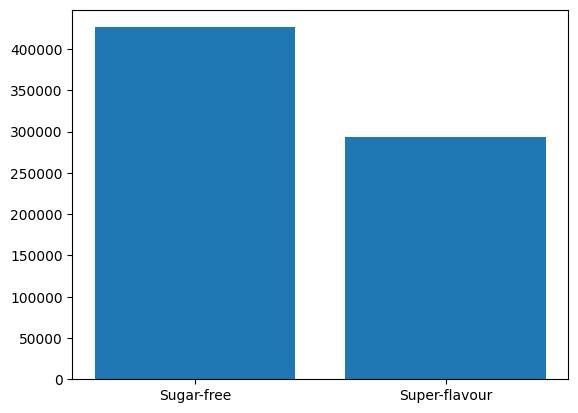

In [49]:
#Con un gráfico de barras vemos que la categoría más usada es la de los productos sin azucar

plt.bar(valores_caract['Sku_Category'], valores_caract['count'])
plt.show()

<BarContainer object of 47 artists>

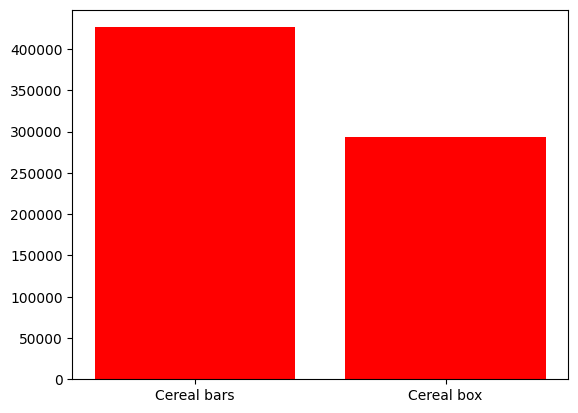

In [50]:
#Con otro gráfico de barras vemos que la subcategoría más usada es la de las barritas de cereales,
#la proporción coincide con la de la categoría, probablemente son los mismos productos.

plt.bar(valores_caract['Sku_Subcategory'], valores_caract['count'], color='red')

In [51]:
#Comprobemos si, efectivamente, son los mismos productos
cereal_bars = valores_caract[valores_caract['Sku_Subcategory'] == 'Cereal bars']
cereal_box = valores_caract[valores_caract['Sku_Subcategory'] == 'Cereal box']

print("Cereal bars corresponden a la categoría:", cereal_bars['Sku_Category'].unique())
print("Cereal box corresponden a la categoría:", cereal_box['Sku_Category'].unique())


Cereal bars corresponden a la categoría: ['Sugar-free']
Cereal box corresponden a la categoría: ['Super-flavour']


Conclusión visualización 1:

Concluimos que todas las Cereal bars son Sugar-free y todas las Cereal box son Super-flavour

In [52]:
#Segunda visualización: Lo primero es crear una columna con el formato YYYY-MM para usar en el eje X
#y la suma de todas las unidades vendidas (en general) para usar en el eje Y de un gráfico de línea

ventas_caract = proveedores.merge(m_productos, on='Sku')
ventas_caract['Date'] = pd.to_datetime(ventas_caract['Date'])
ventas_caract['Month'] = ventas_caract['Date'].dt.month
ventas_caract['Year'] = ventas_caract['Date'].dt.year

ventas_caract = ventas_caract.groupby(['Year', 'Month'])['Pieces'].sum()
ventas_caract = ventas_caract.reset_index()
ventas_caract['Year'] = ventas_caract['Year'].astype(str)
ventas_caract['Month'] = ventas_caract['Month'].astype(str)
ventas_caract['Year_Month'] = ventas_caract['Year'] + '-' + ventas_caract['Month']



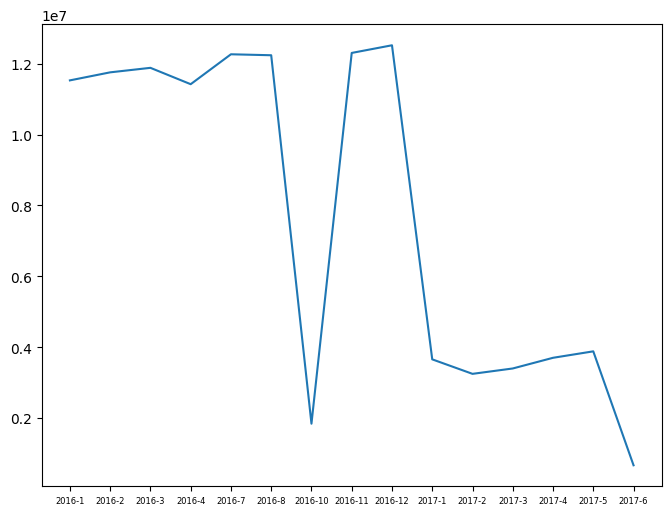

In [53]:
#Hacemos el plot de la línea. Comprobamos que hay un bajón de ventas en 2017 y que faltan meses (2016-05, 2016-06 y 2016-09)
fig = plt.figure(figsize=(8, 6))
plt.plot(ventas_caract['Year_Month'], ventas_caract['Pieces'])
plt.xticks(fontsize=6)
plt.show()

Conclusión visualización 2:

Informaremos al cliente de que hay una ausencia de datos: los meses 05, 06 y 09 (Mayo, Junio y Septiembre) de 2016.

También haremos notar que hay un descenso muy pronunciado de ventas en el año 2017.

In [54]:
#Tercera visualización: fusionaremos las ventas con la tabla de clientes, y agruparemos por tienda,
#sumando la cantidad total de unidades vendidas por cada tienda y seleccionando el top 10 de tiendas que más venden.
divisiones = proveedores.merge(m_clientes, on='Store_Id')
divisiones = divisiones.groupby('NOMBRE DE TDA')['Pieces'].sum().reset_index()
divisiones = divisiones.head(10)

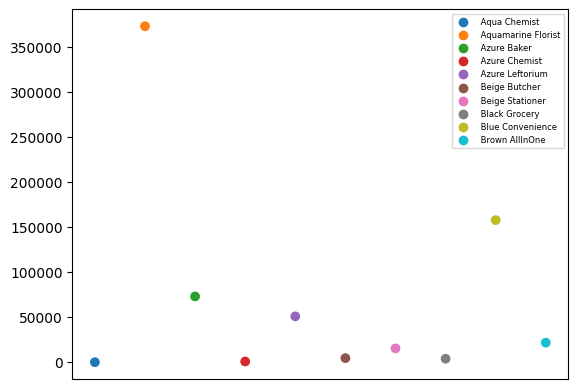

In [55]:
#Realizamos un scatter plot y vemos que, del top 10, Aquamarine Florist ha vendido más del doble que el Nº2.
colors = sns.color_palette()[0:10]
plt.scatter(divisiones['NOMBRE DE TDA'], divisiones['Pieces'], color=colors)
plt.xticks([])
handles = []
for i, label in enumerate(divisiones['NOMBRE DE TDA']):
    handle = plt.scatter([], [], color=colors[i])
    handles.append(handle)
plt.legend(handles, divisiones['NOMBRE DE TDA'], fontsize=6)

plt.show()

Conclusión visualizacion 3:

Habría que consultar el tipo de tienda que es Aquamarine Florist para ver si justifica el haber vendido más del doble que la siguiente en el top 10 de tiendas que más unidades venden. Podría haber alguna errata en los datos.

In [56]:
#Visualización 4: veremos cómo están repartidas las tiendas en las divisiones del estado.
#Primero unimos proveedores con clientes, y luego contamos cuantas veces aparece cada división.
divisiones = proveedores.merge(m_clientes, on='Store_Id')
divisiones = divisiones['DIVISION'].value_counts().reset_index()

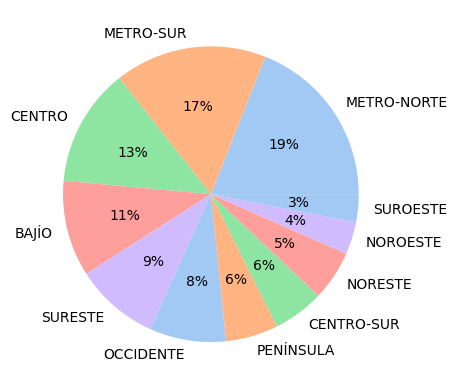

In [57]:
#Realizamos una pie chart 
colors = sns.color_palette('pastel')[0:5]
plt.pie(divisiones['count'], labels=divisiones['DIVISION'], colors = colors, autopct='%.0f%%')
plt.show()

Conclusión visualización 4:

Existiendo 11 divisiones territoriales, entre 3 (Metro norte, Metro sur, y Centro) aúnan el 49% de las ventas, siendo las 3 divisiones más importantes.

In [58]:
#visualización 5: vamos a ver cuantas unidades vende cada grado de los 6 que hay.
#Los uniremos agrupando por grado y proveedor y sacaremos la media de unidades vendidas por cada tienda

divisiones = proveedores.merge(m_clientes, on='Store_Id')
divisiones_agregadas = divisiones.groupby(['GRADO', 'PROVEEDOR'])['Pieces'].mean()
divisiones_agregadas = divisiones_agregadas.reset_index()


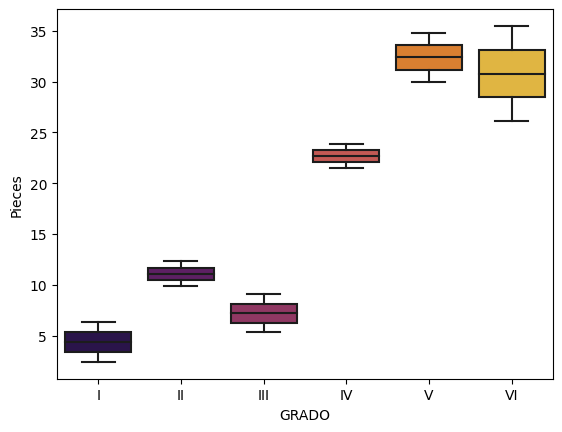

In [59]:
#Creamos un boxplot y comprobamos que hay muchísimas diferencias entre grados, 
#siendo más exitoso cuanto más alto el grado
sns.boxplot(x='GRADO', y='Pieces', data=divisiones_agregadas, palette='inferno')
plt.show()

Conclusión visualización 5:

Los grados aumentan la media de unidades vendidas conforme crecen, pareciendo una forma de medir la efectividad de las tiendas.

Además, hay un salto muy grande entre los tres primeros y los tres últimos grados, con una media de unidades vendeidas mucho más grande.